# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="600"/></center>

<em>*Created with ChapGPT</em>

## Lecture 3: Data collection and preparation

 - Tabular and time-series data with `Pandas`
 - Data wrangling
 - Test/train/val split


## Introduction to Pandas

<div style="text-align: center;">
    <img width="40%" src="https://hips.hearstapps.com/elleuk.cdnds.net/16/36/3200x1599/gallery-1473083573-pandas.jpg" alt="Waving panda" style="min-width: 400px">
    <div><small><em><a href="https://www.elle.com/uk/life-and-culture/culture/news/a31745/10-ways-to-celebrate-pandas-no-longer-being-endangered/">Source</a></em></small></div>
</div>

Pandas is a powerful library especially designed to work with tabular data and has powerful time-series analysis tools. It leans on many ideas from `R` and is built on top of `NumPy`. It is a very powerful tool for data manipulation and analysis.

These slides lean heavily on a fantastic [Pandas Workshop](https://github.com/stefmolin/pandas-workshop/tree/main) put together by Stefanie Molin.

We will begin by introducing the `Series`, `DataFrame`, and `Index` classes, which are the basic building blocks of the pandas library, and showing how to work with them. By the end of this section, you will be able to create DataFrames and perform operations on them to inspect and filter the data.

In [1]:
import pandas as pd

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [2]:
meteorites = pd.read_csv('_data/Meteorite_Landings.csv', nrows=5)
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### Series:

In [3]:
meteorites.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

#### Columns:

In [4]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Index:

In [5]:
meteorites.index

RangeIndex(start=0, stop=5, step=1)

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

### Using a flat file

In [6]:
import pandas as pd

meteorites = pd.read_csv('_data/Meteorite_Landings.csv')

### From scratch

Another common approach is using a dictionary as the argument to `pd.DataFrame()`

In [7]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data)

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


We can also specify an index:

In [8]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data, index = ['Ke', 'Julian', 'Duong', 'Andreas'])

,apples,oranges
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


If we have an existing DataFrame we can also specify the index using `set_index()`

In [9]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2],
    'names': ['Ke', 'Julian', 'Duong', 'Andreas']
}

df = pd.DataFrame(data)
df

,apples,oranges,names
0,3,0,Ke
1,2,3,Julian
2,0,7,Duong
3,1,2,Andreas


In [10]:
df.set_index('names')

,apples,oranges
names,,
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

## Inspecting the data
Now that we have some data, we need to perform an initial inspection of it. This gives us information on what the data looks like, how many rows/columns there are, and how much data we have. 

Let's inspect the `meteorites` data.

#### What does the data look like?

In [11]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [12]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


#### Get some information about the DataFrame

In [13]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [14]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [15]:
meteorites['mass (g)']

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64

#### Selecting rows

In [16]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [17]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


We use `loc[]` to select by name:

In [18]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [19]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling:

In [20]:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [21]:
meteorites.fall.value_counts(normalize=True)

fall
Found    0.975785
Fell     0.024215
Name: proportion, dtype: float64

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [22]:
meteorites['mass (g)'].mean()

13278.078548601512

**Important**: The mean isn't always the best measure of central tendency. If there are outliers in the distribution, the mean will be skewed. Here, the mean is being pulled higher by some very heavy meteorites &ndash; the distribution is [right-skewed](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Taking a look at some quantiles at the extremes of the distribution shows that the mean is between the 95th and 99th percentile of the distribution, so it isn't a good measure of central tendency here:

In [23]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.50       32.60
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

A better measure in this case is the median (50th percentile), since it is robust to outliers:

In [24]:
meteorites['mass (g)'].median()

32.6

#### What was the mass of the heaviest meteorite?

In [25]:
meteorites['mass (g)'].idxmax()

16392

Let's extract the information on this meteorite:

In [26]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

*Fun fact: This meteorite landed in Namibia and is a tourist attraction.*

<div>
    <img width="25%" style="margin-top: -5px; margin-bottom: -5px; min-width: 200px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Hoba_meteorite_%2815682150765%29.jpg/1280px-Hoba_meteorite_%2815682150765%29.jpg" alt="Hoba meteorite (source: Wikipedia)"/>
    <div><small><em>Source: Wikipedia</em></small></div>
</div>

#### How many different types of meteorite classes are represented in this dataset?

In [27]:
meteorites.recclass.nunique()

466

Some examples:

In [28]:
meteorites.recclass.unique()[:14]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an'],
      dtype=object)

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [29]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

## Group-by operations

Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [30]:
import numpy as np
meteorites.groupby('recclass').describe(include=np.number)

id                                                 \
                       count          mean           std      min       25%   
recclass                                                                      
Acapulcoite             54.0  27540.851852  17364.454850     10.0  16427.75   
Acapulcoite/Lodranite    6.0  29920.333333  21322.728209   8041.0  11263.00   
Acapulcoite/lodranite    3.0  46316.000000   8881.227167  36290.0  42876.00   
Achondrite-prim          9.0  36680.000000   8512.903647  31230.0  31269.00   
Achondrite-ung          57.0  41284.561404  15758.680448   4257.0  33357.00   
...                      ...           ...           ...      ...       ...   
Unknown                  7.0  11619.285714   6561.200594    425.0   8808.00   
Ureilite               300.0  28814.100000  17559.021207    285.0  11327.75   
Ureilite-an              4.0  28119.750000  16106.130662  14511.0  15866.25   
Ureilite-pmict          23.0  20649.652174  16273.007538   5617.0   6364.00   
Winonaite               25.0  30857.640000  13966.904948  10169.0  20167.00   

                                                  mass (g)               ...  \
                           50%       75%      max    count         mean  ...   
recclass                                                                 ...   
Acapulcoite            31242.0  38500.75  56689.0     54.0   490.424407  ...   
Acapulcoite/Lodranite  29408.5  48659.50  52373.0      6.0    31.793333  ...   
Acapulcoite/lodranite  49462.0  51329.00  53196.0      3.0    44.933333  ...   
Achondrite-prim        33299.0  33574.00  53843.0      9.0  1078.000000  ...   
Achondrite-ung         47712.0  53609.00  57268.0     57.0   895.845614  ...   
...                        ...       ...      ...      ...          ...  ...   
Unknown                12348.0  16417.50  18111.0      0.0          NaN  ...   
Ureilite               30954.0  45589.75  57374.0    300.0   490.014900  ...   
Ureilite-an            24526.5  36780.00  48915.0      4.0  1287.125000  ...   
Ureilite-pmict         16978.0  33546.00  52585.0     23.0   262.685652  ...   
Winonaite              25346.0  44930.00  54512.0     25.0  1129.013200  ...   

                          reclat           reclong                         \
                             75%       max   count        mean        std   
recclass                                                                    
Acapulcoite            12.662498  35.23600    38.0   40.802177  96.847026   
Acapulcoite/Lodranite   0.000000   0.00000     5.0   95.803296  87.469926   
Acapulcoite/lodranite   0.000000   0.00000     2.0    0.000000   0.000000   
Achondrite-prim         0.000000   0.00000     3.0    0.000000   0.000000   
Achondrite-ung          0.000000  45.70000    37.0   15.765216  32.217549   
...                          ...       ...     ...         ...        ...   
Unknown                -7.216670  50.66667     5.0   44.340000  79.543348   
Ureilite               19.216908  60.24556   214.0   55.952609  70.744550   
Ureilite-an           -29.468790  20.74575     3.0  117.873990  74.016539   
Ureilite-pmict         27.033873  27.05417    18.0   65.349957  67.814906   
Winonaite              20.499997  53.03639    18.0    7.926038  62.545438   

                                                                                
                             min        25%         50%         75%        max  
recclass                                                                        
Acapulcoite           -141.50000   0.000000   30.833335  159.361125  160.41700  
Acapulcoite/Lodranite    0.00000   0.000000  157.176110  160.491390  161.34898  
Acapulcoite/lodranite    0.00000   0.000000    0.000000    0.000000    0.00000  
Achondrite-prim          0.00000   0.000000    0.000000    0.000000    0.00000  
Achondrite-ung          -4.33333   0.000000    0.000000   26.000000  162.56681  
...                          ...        ...         ...         ...    

In [31]:
meteorites.groupby('recclass')['mass (g)'].mean().head()

recclass
Acapulcoite               490.424407
Acapulcoite/Lodranite      31.793333
Acapulcoite/lodranite      44.933333
Achondrite-prim          1078.000000
Achondrite-ung            895.845614
Name: mass (g), dtype: float64

In [32]:
meteorites.groupby('recclass').agg({'mass (g)':['mean', 'std'], 'name': ['count']}).head()

mass (g)               name
                              mean          std count
recclass                                             
Acapulcoite             490.424407  1279.406632    54
Acapulcoite/Lodranite    31.793333    26.215771     6
Acapulcoite/lodranite    44.933333    73.678106     3
Achondrite-prim        1078.000000  1246.035613     9
Achondrite-ung          895.845614  2217.850529    57

We are only scratching the surface; some additional functionalities to be aware of include the following:
- We can group by multiple columns &ndash; this creates a hierarchical index.
- Groups can be excluded from calculations with the `filter()` method.
- We can group on content in the index using the `level` or `name` parameters e.g., `groupby(level=0)` or `groupby(name='year')`.
- We can group by date ranges if we use a `pd.Grouper()` object.

# Data Wrangling


To prepare our data for analysis, we need to perform data wrangling. 

In this lecture, we will learn how to clean and reformat data (e.g., renaming columns and fixing data type mismatches), restructure/reshape it, and enrich it (e.g., discretizing columns, calculating aggregations, and combining data sources).

## Data cleaning

In this section, we will take a look at creating, renaming, and dropping columns; type conversion; and sorting &ndash; all of which make our analysis easier. We will be working with the 2019 Yellow Taxi Trip Data provided by NYC Open Data.

In [33]:
import pandas as pd

taxis = pd.read_csv('_data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) collected via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Dropping columns
Let's start by dropping the ID columns and the `store_and_fwd_flag` column, which we won't be using.

In [34]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [35]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Tip: Another way to do this is to select the columns we want to keep: `taxis.loc[:,~mask]`.*

### Renaming columns

Next, let's rename the datetime columns:

In [36]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    }
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

### Type conversion

Notice anything off with the data types?

In [37]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Both `pickup` and `dropoff` should be stored as datetimes. Let's fix this:

In [38]:
taxis[['pickup', 'dropoff']] = taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

*Tip: There are other ways to perform type conversion. For numeric values, we can use the `pd.to_numeric()` function, and we will see the `astype()` method, which is a more generic method, a little later.*

### Creating new columns

Let's calculate the following for each row:

1. elapsed time of the trip
2. the tip percentage
3. the total taxes, tolls, fees, and surcharges
4. the average speed of the taxi

In [39]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

Our new columns get added to the right:

In [40]:
taxis.head(2)

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.1999,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.0000,1.80,9.022556


Some things to note:
- We used `lambda` functions to 1) avoid typing `taxis` repeatedly and 2) be able to access the `cost_before_tip` and `elapsed_time` columns in the same method that we create them.
- To create a single new column, we can also use `df['new_col'] = <values>`.

### Sorting by values

We can use the `sort_values()` method to sort based on any number of columns:

In [41]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
5997,2019-10-23 15:55:19,2019-10-23 16:08:25,6,1.58,2,10.0,1.0,0.5,0.0,0.0,0.3,14.3,2.5,0 days 00:13:06,14.3,0.000000,4.3,7.236641
443,2019-10-23 15:56:59,2019-10-23 16:04:33,6,1.46,2,7.5,1.0,0.5,0.0,0.0,0.3,11.8,2.5,0 days 00:07:34,11.8,0.000000,4.3,11.577093
8722,2019-10-23 15:57:33,2019-10-23 16:03:34,6,0.62,1,5.5,1.0,0.5,0.7,0.0,0.3,10.5,2.5,0 days 00:06:01,9.8,0.071429,4.3,6.182825
4198,2019-10-23 15:57:38,2019-10-23 16:05:07,6,1.18,1,7.0,1.0,0.5,1.0,0.0,0.3,12.3,2.5,0 days 00:07:29,11.3,0.088496,4.3,9.461024
8238,2019-10-23 15:58:31,2019-10-23 16:29:29,6,3.23,2,19.5,1.0,0.5,0.0,0.0,0.3,23.8,2.5,0 days 00:30:58,23.8,0.000000,4.3,6.258342


To pick out the largest/smallest rows, use `nlargest()` / `nsmallest()` instead. Looking at the 3 trips with the longest elapsed time, we see some possible data integrity issues:

In [42]:
taxis.nlargest(3, 'elapsed_time')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,1,3.75,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5,0 days 23:58:53,21.8,0.0,4.3,0.156371
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,1,11.19,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0,0 days 23:58:40,41.3,0.0,1.8,0.466682
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,1,0.70,2,7.0,1.0,0.5,0.0,0.0,0.3,11.3,2.5,0 days 23:58:39,11.3,0.0,4.3,0.029194


### Exercise 1.

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

## Working with the index

So far, we haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index

Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling `set_index()`:

In [43]:
taxis = taxis.set_index('pickup')
taxis.head(3)

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.199900,10.42,13.804642
2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.8,2.5,0 days 00:12:27,13.80,0.144928,4.30,6.554217


Since we have a sample of the full dataset, let's sort the index to order by pickup time:

In [44]:
taxis = taxis.sort_index()

*Tip: `taxis.sort_index(axis=1)` will sort the columns by name. The `axis` parameter is present throughout the pandas library: `axis=0` targets rows and `axis=1` targets columns.*

### Resetting the index

We will be working with time series later this section, but sometimes we want to reset our index to row numbers and restore the columns. We can make `pickup` a column again with the `reset_index()` method:

In [45]:
taxis = taxis.reset_index()
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277


### Exercise 2

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. 

Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

***Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)*

## Time series

- When working with time series data, pandas provides us with additional functionality to not just compare the observations in our dataset, but to use their relationship in time to analyze the data. 
- In this section, we will see a few such operations for selecting date/time ranges, calculating changes over time, performing window calculations, and resampling the data to different date/time intervals.

### Selecting based on date and time

We will continue to use the `taxis` dataset and this time we will set the `dropoff` column as the index and sort the data:

In [46]:
taxis = taxis.set_index('dropoff').sort_index()

We can now select ranges from our data based on the datetime the same way we did with row numbers:

In [47]:
taxis['2019-10-24 12':'2019-10-24 13']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


We can also represent this range with shorthand. Note that we must use `loc[]` here:

In [48]:
taxis.loc['2019-10-24 12']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


However, if we want to look at this time range across days, we need another strategy.

We can pull out the dropoffs that happened between a certain time range on *any* day with the `between_time()` method:

In [49]:
taxis.between_time('12:00', '13:00')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 12:53:49,2019-10-23 12:35:27,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.000000,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.200000,4.3,0.068301


*Tip: The `at_time()` method can be used to extract all entries at a given time (e.g., 12:35:27).*

Finally, `head()` and `tail()` limit us to a number of rows, but we may be interested in rows within the first/last 2 hours (or any other time interval) of the data, in which case, we should use `first()` / `last()`:

In [50]:
taxis.first('1h')

/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_30177/2449197755.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  taxis.first('1h')


,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2019-10-23 07:48:58,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.00000,4.3,12.628272
2019-10-23 08:03:16,2019-10-23 07:05:34,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.07722,1.8,15.265165
2019-10-23 08:36:05,2019-10-23 08:18:47,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.00000,4.3,8.289017


*Tip: Available date/time offsets can be found in the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).* 

For the rest of this section, we will be working with a modified version the TSA traveler throughput data (see the notes for how we made it):

In [51]:
tsa_melted_holiday_travel = pd.read_csv('_data/tsa_melted_holiday_travel.csv', parse_dates=True, index_col='date')
tsa_melted_holiday_travel

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN
...,...,...,...
2021-05-10,2021,1657722.0,NaN
2021-05-11,2021,1315493.0,NaN
2021-05-12,2021,1424664.0,NaN


### Calculating change over time

In [52]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

,year,travelers,holiday,one_day_change,seven_day_change
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,NaN,NaN
2020-01-02,2020,2178656.0,New Year's Day,-133076.0,NaN
2020-01-03,2020,2422272.0,NaN,243616.0,NaN
2020-01-04,2020,2210542.0,NaN,-211730.0,NaN
2020-01-05,2020,1806480.0,NaN,-404062.0,NaN
2020-01-06,2020,1815040.0,NaN,8560.0,NaN
2020-01-07,2020,2034472.0,NaN,219432.0,NaN
2020-01-08,2020,2072543.0,NaN,38071.0,-239189.0
2020-01-09,2020,1687974.0,NaN,-384569.0,-490682.0


*Tip: To perform operations other than subtraction, take a look at the `shift()` method. It also makes it possible to perform operations across columns.*

### Resampling
We can use resampling to aggregate time series data to a new frequency:

In [53]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('Q').agg(['sum', 'mean', 'std'])

/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_30177/1496422836.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample('Q').agg(['sum', 'mean', 'std'])


year                 travelers                             
               sum    mean  std          sum          mean            std
date                                                                     
2019-03-31  181710  2019.0  0.0  189281658.0  2.103130e+06  282239.618354
2019-06-30  183729  2019.0  0.0  221756667.0  2.436886e+06  212600.697665
2019-09-30  185748  2019.0  0.0  220819236.0  2.400209e+06  260140.242892
2019-12-31  185748  2019.0  0.0  211103512.0  2.294603e+06  260510.040655
2020-03-31  181800  2020.0  0.0  155354148.0  1.726157e+06  685094.277420
2020-06-30  183820  2020.0  0.0   25049083.0  2.752646e+05  170127.402046
2020-09-30  185840  2020.0  0.0   63937115.0  6.949686e+05  103864.705739
2020-12-31  185840  2020.0  0.0   77541248.0  8.428397e+05  170245.484185
2021-03-31  181890  2021.0  0.0   86094635.0  9.566071e+05  280399.809061

### Window calculations

 - Window calculations are similar to group by calculations except the group over which the calculation is performed isn't static &ndash; it can move or expand. 
 - Pandas provides functionality for constructing a variety of windows, including moving/rolling windows, expanding windows (e.g., cumulative sum or mean up to the current date in a time series), and exponentially weighted moving windows (to weight closer observations more than further ones).
 - We will only look at rolling and expanding calculations here.

Performing a window calculation is very similar to a group by calculation &ndash; we first define the window, and then we specify the aggregation:

In [54]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)

,year,travelers,holiday,7D MA,YTD mean
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,2.311732e+06,2.311732e+06
2020-01-02,2020,2178656.0,New Year's Day,2.245194e+06,2.245194e+06
2020-01-03,2020,2422272.0,NaN,2.304220e+06,2.304220e+06
2020-01-04,2020,2210542.0,NaN,2.280800e+06,2.280800e+06
2020-01-05,2020,1806480.0,NaN,2.185936e+06,2.185936e+06
2020-01-06,2020,1815040.0,NaN,2.124120e+06,2.124120e+06
2020-01-07,2020,2034472.0,NaN,2.111313e+06,2.111313e+06
2020-01-08,2020,2072543.0,NaN,2.077144e+06,2.106467e+06
2020-01-09,2020,1687974.0,NaN,2.007046e+06,2.059968e+06


To understand what's happening, it's best to visualize the original data and the result, so here's a sneak peek of plotting with pandas.

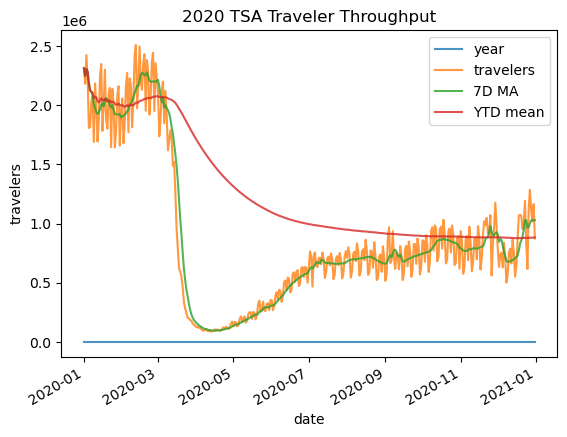

In [55]:
_ = tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=.8)

Other types of windows:
- [exponentially weighted moving](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html): use the `ewm()` method
- [custom](https://pandas.pydata.org/docs/user_guide/window.html#window-custom-rolling-window): create a subclass of `pandas.api.indexers.BaseIndexer` or use a pre-built one in `pandas.api.indexers`

### Exercise 3

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

## Training, test and validation data

Data-driven models fundamentally rely on held-back data for to ensure against *over-fitting*

Over-fitting occurs when you fit really well to the training data but then fail to generalize to unseen data - deafting the purpose of a predictive model

This becomes particularly dangerous when the number of parameters is large, such as when training neural networks, because it is easy for these expressive models to fit almost any data.

## Training, test and validation data

We therefore need to keep some data back to test how well our model generalizes - this is our *test* data

<center><img src="_images/grid_search_workflow.png" alt="wokflow" width="600"/></center>

## Validation data

Note, that the inner cross-validation loop also requires some data that is (ideally) distinct from our training data - this is our *validation data*



## Validation data

There are many ways to choose this data, but a common approach is *k-fold* cross validation:

<center><img src="_images/grid_search_cross_validation.png" alt="wokflow" width="600"/></center>

## Accounting for correlations and data balance

Choosing the appropriate splits can be complicated if your data is inbalanced or correlated in some way


<center><img src="_images/sphx_glr_plot_cv_indices_002.png" alt="wokflow" width="600"/></center>

## Accounting for correlations and data balance

Ideally you want to split the data so that the validation data equally samples different classes and groups. `scikit-learn` provides many options for achieving this (see the [docs](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)).

It might be easy to shuffle the data, but for large datasets this might need to be done with just indices. 

In general, be careful of e.g. seasonality, long term trends and spatial covariances. 

Golden rule: Treat your test data as sacred!